In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Data

In [ ]:
data=pd.read_csv('/content/Chess.com-FIDE_Rating.csv')
data.head()

,FIDE_Name,FIDE_Standard,FIDE_Rapid,FIDE_Blitz,Chess.com_blitz,Chess.com_rapid,Chess.com_bullet
0,"Carlsen, Magnus",2839,2819,2883,3298,2942,3184
1,"Caruana, Fabiano",2784,2756,2782,3111,2808,3203
2,"Nakamura, Hikaru",2807,2738,2838,3393,2800,3343
3,"Aronian, Levon",2742,2742,2768,3122,2795,3057
4,"Firouzja, Alireza",2766,2767,2814,3315,2828,3357


In [ ]:
data.drop(['FIDE_Name','FIDE_Rapid','FIDE_Blitz'],inplace=True,axis=1)
data.head()

,FIDE_Standard,Chess.com_blitz,Chess.com_rapid,Chess.com_bullet
0,2839,3298,2942,3184
1,2784,3111,2808,3203
2,2807,3393,2800,3343
3,2742,3122,2795,3057
4,2766,3315,2828,3357


In [ ]:
data.describe()

,FIDE_Standard,Chess.com_blitz,Chess.com_rapid,Chess.com_bullet
count,391.000000,391.000000,391.000000,391.000000
mean,2479.378517,2735.616368,2391.741688,2628.350384
std,209.040972,352.350665,298.230675,388.226589
min,1450.000000,1000.000000,1122.000000,920.000000
25%,2450.000000,2657.500000,2307.000000,2510.000000
50%,2511.000000,2799.000000,2462.000000,2702.000000
75%,2579.000000,2932.000000,2576.500000,2865.500000
max,2839.000000,3393.000000,2942.000000,3357.000000


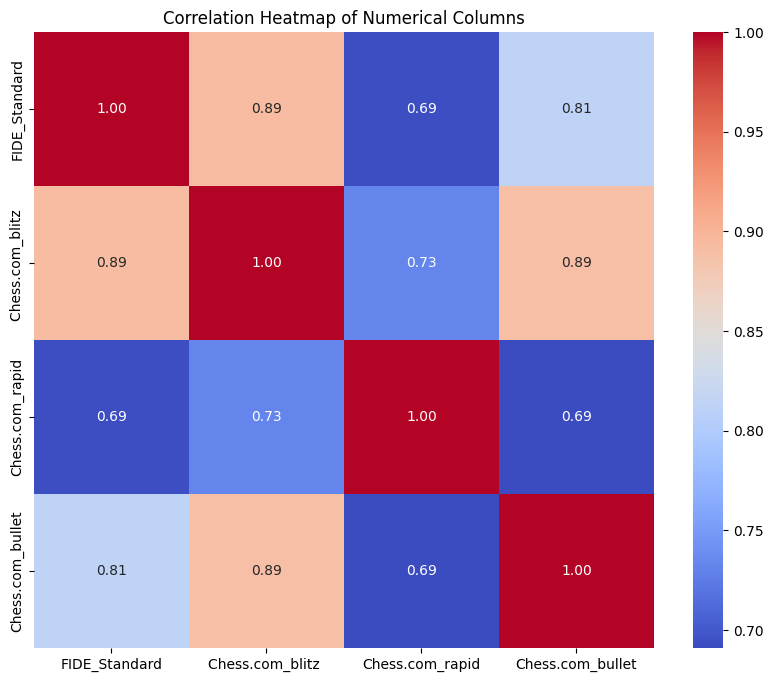

In [ ]:

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

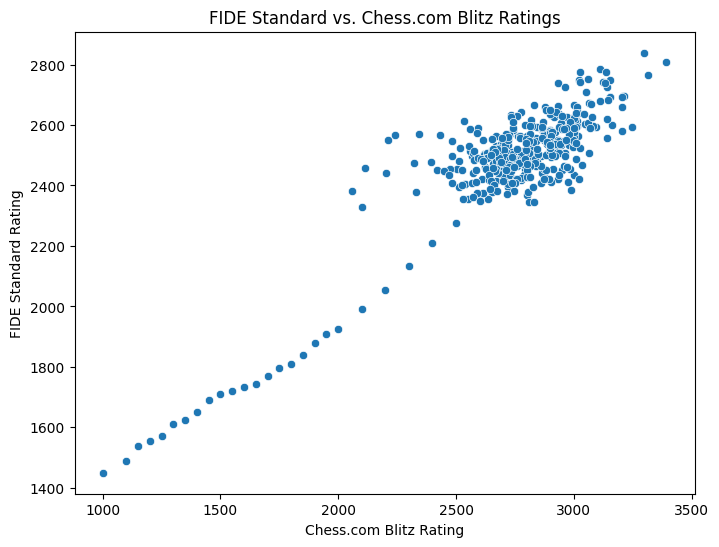

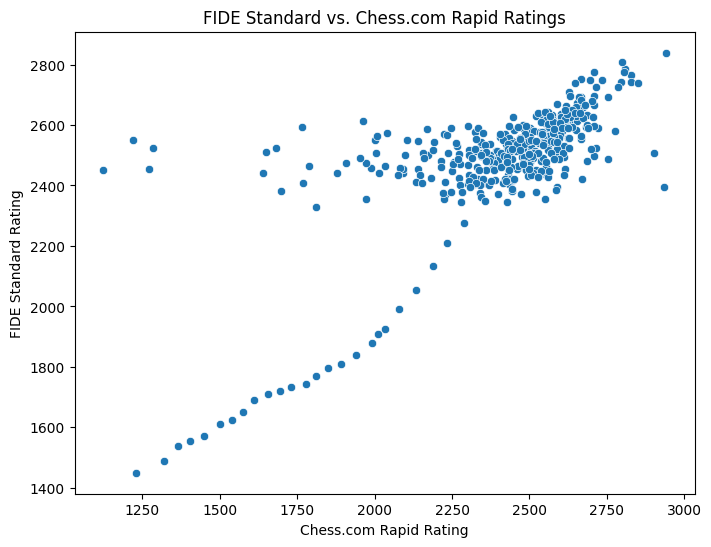

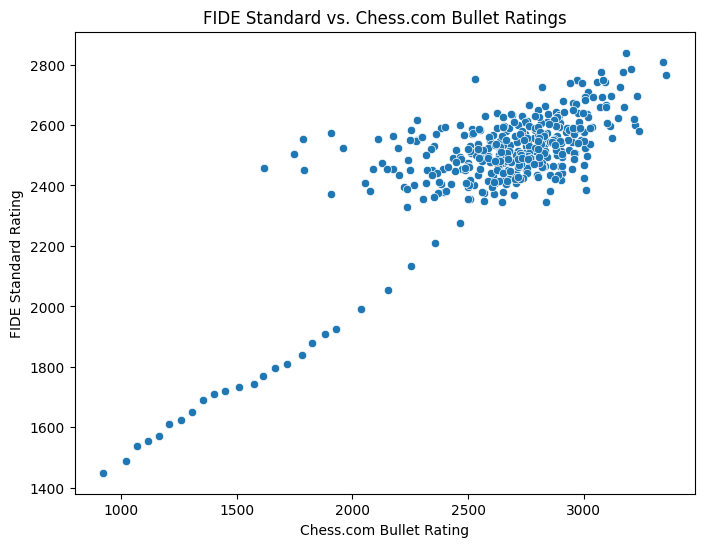

In [ ]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chess.com_blitz ', y='FIDE_Standard', data=data)
plt.title('FIDE Standard vs. Chess.com Blitz Ratings')
plt.xlabel('Chess.com Blitz Rating')
plt.ylabel('FIDE Standard Rating')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chess.com_rapid', y='FIDE_Standard', data=data)
plt.title('FIDE Standard vs. Chess.com Rapid Ratings')
plt.xlabel('Chess.com Rapid Rating')
plt.ylabel('FIDE Standard Rating')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chess.com_bullet', y='FIDE_Standard', data=data)
plt.title('FIDE Standard vs. Chess.com Bullet Ratings')
plt.xlabel('Chess.com Bullet Rating')
plt.ylabel('FIDE Standard Rating')
plt.show()

In [ ]:
print(data.columns)

Index(['FIDE_Standard', 'Chess.com_blitz ', 'Chess.com_rapid',
       'Chess.com_bullet'],
      dtype='object')


# Linear Regression

In [ ]:
input=['Chess.com_bullet', 'Chess.com_blitz ', 'Chess.com_rapid']
output=['FIDE_Standard']

In [ ]:
def print_metrics(model,y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")
  print(f"Train set score: {model.score(X_train,y_train)}")
  print(f"Test set score: {model.score(X_test,y_test)}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data[input], data[output], test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_metrics(lin_model,y_test,y_pred)

Mean Squared Error: 8440.028025313553
R-squared: 0.8670909619397296
Train set score: 0.7741999067386507
Test set score: 0.8670909619397296


# Decision Tree

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print_metrics(dt_model,y_test,y_pred)


Mean Squared Error: 10038.177215189873
R-squared: 0.841924164997089
Train set score: 1.0
Test set score: 0.841924164997089


# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best negative mean squared error:  -6667.944225994722


In [ ]:
rf_model=RandomForestRegressor(random_state=42,n_estimators=300,max_depth=10,min_samples_leaf=1,min_samples_split=2,max_features='sqrt')
rf_model.fit(X_train,y_train.values)
y_pred=rf_model.predict(X_test)
print_metrics(rf_model,y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 5932.85905984261
R-squared: 0.9065725151355114
Train set score: 0.9631977537393906
Test set score: 0.9065725151355114


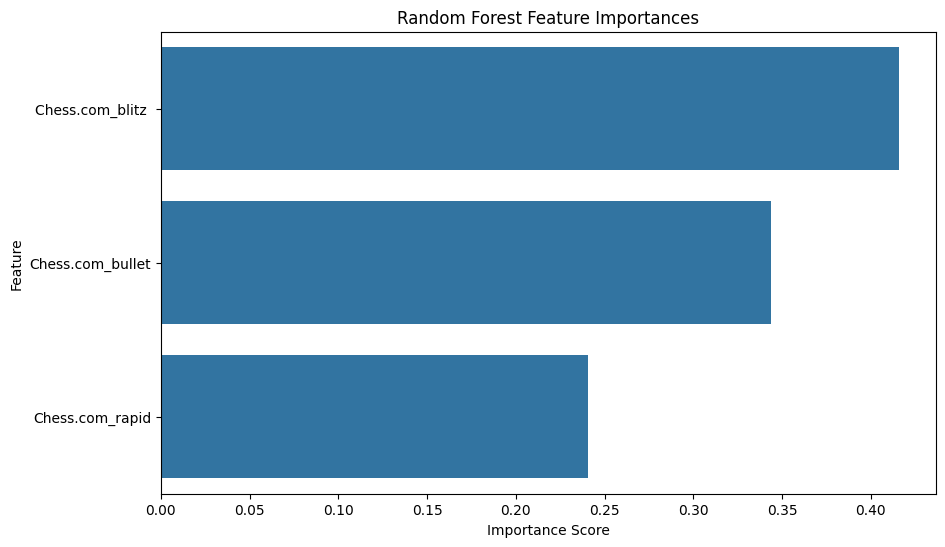

In [ ]:

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# XGBoost

In [ ]:

import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train.values.ravel())
print("\nBest parameters found (XGBoost): ", grid_search_xgb.best_params_)
print("Best negative mean squared error (XGBoost): ", grid_search_xgb.best_score_)



Best parameters found (XGBoost):  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best negative mean squared error (XGBoost):  -7291.239013671875


In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 3, n_estimators= 100, subsample= 0.7,objective='reg:squarederror', random_state=42)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print_metrics(xgb,y_test,y_pred)

Mean Squared Error: 6520.04736328125
R-squared: 0.8973258137702942
Train set score: 0.9146649241447449
Test set score: 0.8973258137702942


# Comparing Different models

In [ ]:
print(f"Linear Regression Test R-squared: {lin_model.score(X_test, y_test)}")
print(f"Decision Tree Test R-squared: {dt_model.score(X_test, y_test)}")
print(f"Random Forest Test R-squared: {rf_model.score(X_test, y_test)}")
print(f"XGBoost Test R-squared: {xgb.score(X_test, y_test)}")

Linear Regression Test R-squared: 0.8670909619397296
Decision Tree Test R-squared: 0.841924164997089
Random Forest Test R-squared: 0.9065725151355114
XGBoost Test R-squared: 0.8973258137702942


XGBoost has R-squared almost equal to random forest and has least difference in training score and test score.So, it is best choice for our purpose


In [ ]:
import joblib
joblib.dump(xgb, 'model.pkl')
print("XGBoost model saved successfully as 'model.pkl'")

XGBoost model saved successfully as 'model.pkl'
